<a href="https://colab.research.google.com/github/panchalaman/datavisualisation/blob/main/Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

The performance of students heavily rely on their surroundings, demographics and how well they prepare for a specific test. The preparation not only helps a student to achieve good grades but also provides a conceptual understanding of the topics which are paramount in the growth of their learning curve.

####Targeted Audience:
This report has been curated for decision makers, education experts, data scientists and educational institutes.

####Data Overview:
I have chosen this dataset which includes the performance of a student in high school for the subject mathematics. In which, the grades and demographics details exists. The collection of data has been retrieved from three different high schools in the United States. The dataset itself is well-curated and clean.
####Objectives:
I will utilize a variety of data visualisation tools to reach the conclusion for these research questions:
1.  How effective is a preparatory course impacts a stundent's performance?
2.  What is the impact of parental qualification on students scores?
3.  What are the best possible solutions to reach the best outcomes in the tests?


In [38]:
#Intalling libraries
!pip install numpy
!pip install scipy
!pip install matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno as msno
import io
from math import ceil
from sklearn.preprocessing import LabelEncoder

url = 'https://raw.githubusercontent.com/panchalaman/datavisualisation/main/exam_score.csv' # url path from github repository
df = pd.read_csv(url) #To reach the csv file retrieved from the url
df.head(5) # To show first 5 rows of the dataset

,gender,race/ethnicity,parent qualification,diet,test preparatory course,maths score,reading score,writing score
0,female,group D,some college,standard,none,71,73,78
1,male,group C,some college,standard,completed,89,88,88
2,male,group C,associate's degree,standard,none,96,85,84
3,male,group D,high school,standard,completed,92,96,94
4,female,group C,some high school,free/reduced,none,57,61,61


In [2]:
df.info() # To retrieve a brief data overview and its information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   race/ethnicity           1000 non-null   object
 2   parent qualification     1000 non-null   object
 3   diet                     1000 non-null   object
 4   test preparatory course  1000 non-null   object
 5   maths score              1000 non-null   int64 
 6   reading score            1000 non-null   int64 
 7   writing score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df.describe() #All the neccesary values

,maths score,reading score,writing score
count,1000.000000,1000.000000,1000.00000
mean,67.420000,69.750000,68.39000
std,14.988204,14.484105,15.41225
min,26.000000,26.000000,17.00000
25%,57.000000,60.000000,58.00000
50%,67.000000,71.000000,69.00000
75%,78.000000,80.000000,79.00000
max,100.000000,100.000000,100.00000


# Preprocessing:
For effective data visualisation, the null values must be handled and cleaned.
Steps which should be taken:
1. Checking for Null Values in the dataset
2. Cleaning the data by renaming the columns with appropriate names.
3. Adding one column named 'average' for average marks.
4. Using Label Encoder to covert the value to numeric for correlation heatmap.


In [4]:
null_values = df.isnull().sum() # to check null values
print(null_values)

gender                     0
race/ethnicity             0
parent qualification       0
diet                       0
test preparatory course    0
maths score                0
reading score              0
writing score              0
dtype: int64


In [5]:
df.rename(columns={'race/ethnicity': 'Group', 'parent qualification': 'ParentsQualification', 'test preparatory course': 'PreparatoryCourse', 'gender': 'Gender'}, inplace=True) # Renaming the columns with appropriate names
df['Group']=df['Group'].str.replace('group', '') #To remove the 'group' word
df['ParentsQualification']= df['ParentsQualification'].str.replace('some college','undergraduate') #To replace the 'ParentsQualification' word to 'undergraduate' to match the category
df['average']=((df['maths score']+ df['reading score']+df['writing score'])/3).apply(ceil)
df
#Mapping the completed preparatory course as 1 and none as 0
test_mapping = {
    "none": 0,
    "completed": 1
}
df["PreparatoryCourse"]= df["PreparatoryCourse"].map(test_mapping)
print(df.columns)
df.head(1000) # diplay first 5 rows

Index(['Gender', 'Group', 'ParentsQualification', 'diet', 'PreparatoryCourse',
       'maths score', 'reading score', 'writing score', 'average'],
      dtype='object')


,Gender,Group,ParentsQualification,diet,PreparatoryCourse,maths score,reading score,writing score,average
0,female,D,undergraduate,standard,0,71,73,78,74
1,male,C,undergraduate,standard,1,89,88,88,89
2,male,C,associate's degree,standard,0,96,85,84,89
3,male,D,high school,standard,1,92,96,94,94
4,female,C,some high school,free/reduced,0,57,61,61,60
...,...,...,...,...,...,...,...,...,...
995,female,C,master's degree,standard,0,78,85,90,85
996,male,C,some high school,free/reduced,0,73,72,59,68
997,female,E,associate's degree,standard,0,63,68,69,67
998,female,D,high school,standard,0,77,83,85,82


# Visualisation:

###Gender distribution:
Pie Chart- According to gender distribution visual, the population of male is 51.7% and the population of females is 48.3%.

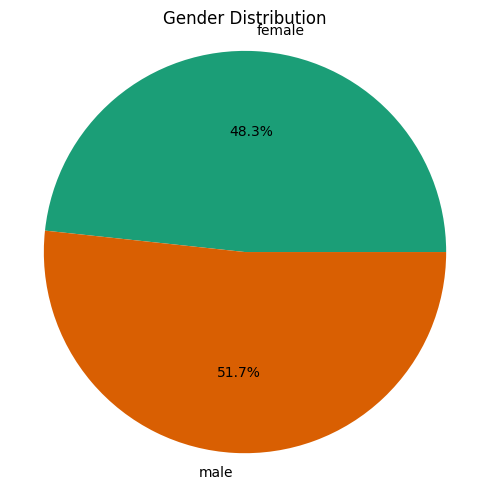

In [29]:
#gender distribution
gender_c=df.groupby('Gender').size() #column
plt.figure(figsize=(5,5))#figure size
plt.pie(gender_c, labels= gender_c.index, colors=sns.color_palette("Dark2", n_colors=len(gender_c)),autopct='%1.1f%%')
plt.title("Gender Distribution") # for title
plt.gca().spines[['top', 'right']].set_visible(False)
plt.axis('equal')#aspect ratio  for pie chart is circular
plt.tight_layout() #format the chart
plt.show()# to show plot

### Group Distribution:
Horizontal Bar Plot-
There are five groups present in the dataset which are A, B, C, D, E. Majority of sample size of dataset is present in Group B.

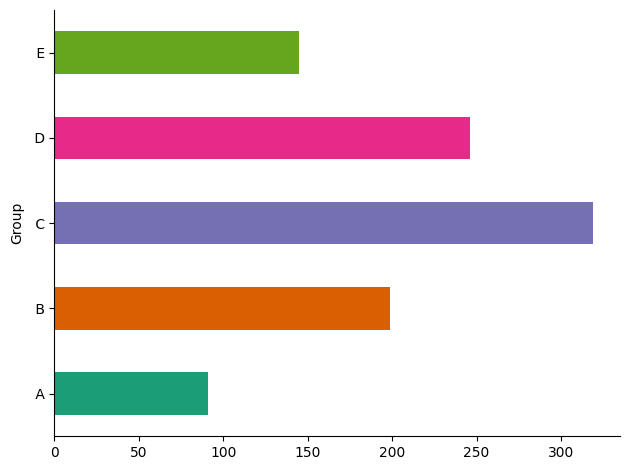

In [31]:
#group distribution
df.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
plt.show()# to show plot


###Parent's Qualification:
Horizonal Bar Plot:
It includes the background of student's parents. It is categorzed in six type. Undergraduate, some high school, master's degree, high school, bachelor's degree and associate's degree. Parents holding master's degree is least as compared to the other groups according to the visual. Most parents have at least undergraduate qualification. Further visual will be presented with versus graphs to represent the comparison between the scoring student and their parent's qualification to conclude the impact of parental qualification on the students scores.

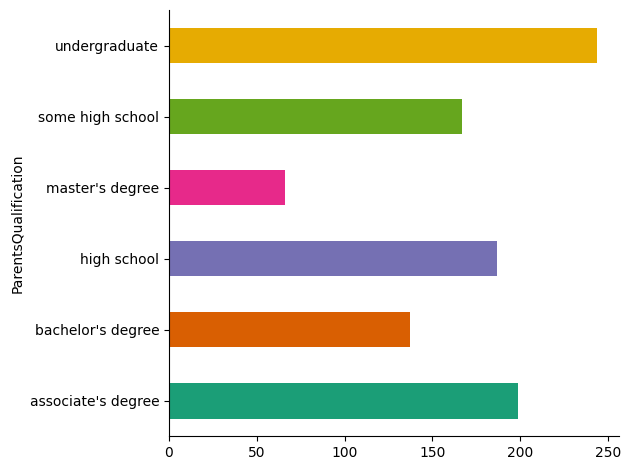

In [24]:
#parentsqualification distribution
df.groupby('ParentsQualification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
plt.show()# to show the plot

###Highest performing group:
Violin Plot-
The plot represents that the highest performing individual based on average score come from group E.

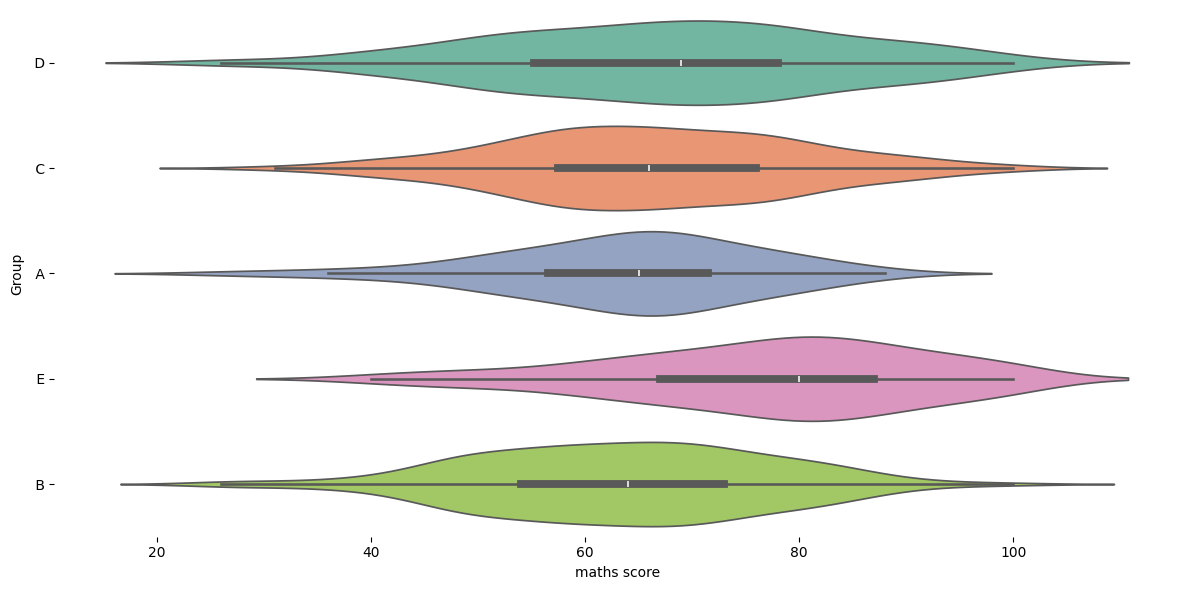

In [23]:
#Highest performing group accross the group category
figsize = (12, 1.2 * len(df['Group'].unique()))
plt.figure(figsize=figsize) #figure size
#for violin plot
sns.violinplot(df, x='maths score', y='Group',hue= "Group", inner='box', palette='Set2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tight_layout()
plt.show()

###Impact of parent's qualification on students:
Violin plot-
According to the violin plot the highest performing student on average scores have a parental background of bachelor's degree.

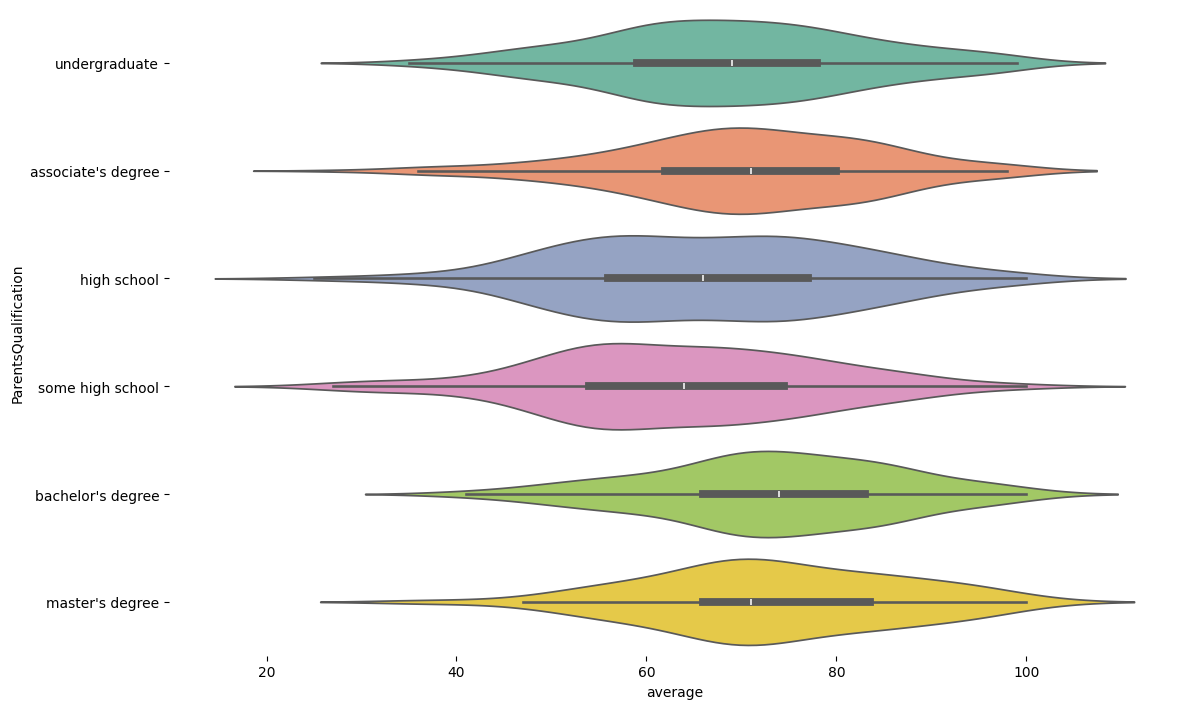

In [22]:
#Impact on scores from parent's qualification
figsize = (12, 1.2 * len(df['ParentsQualification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='average', y='ParentsQualification', hue= "ParentsQualification",inner='box', palette='Set2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tight_layout()
plt.show()

### Meal comparison with the average score:
Violin Plot-
Scholars with standard meal has performed better than the scholars with a preference of free/ reduced meal during their studies.

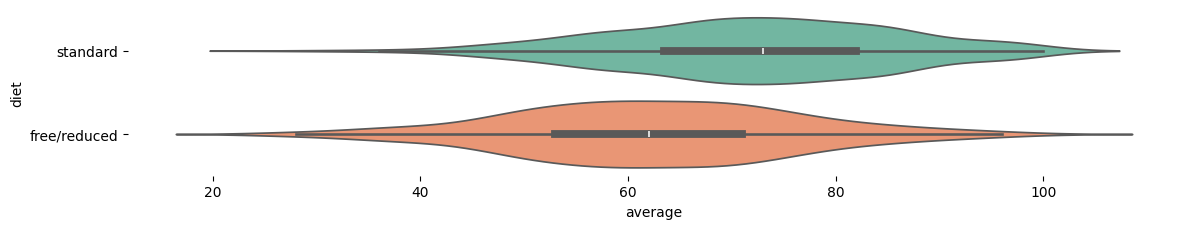

In [21]:
#Meal. vs. average score
figsize = (12, 1.2 * len(df['diet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='average', y='diet', hue= "diet", inner='box', palette='Set2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tight_layout()
plt.show()

###Scores between males and females:
Box Plot-
The visuals represent that the females are performing better than males in reading and writing tests. Males have shown significantly better scores in maths.

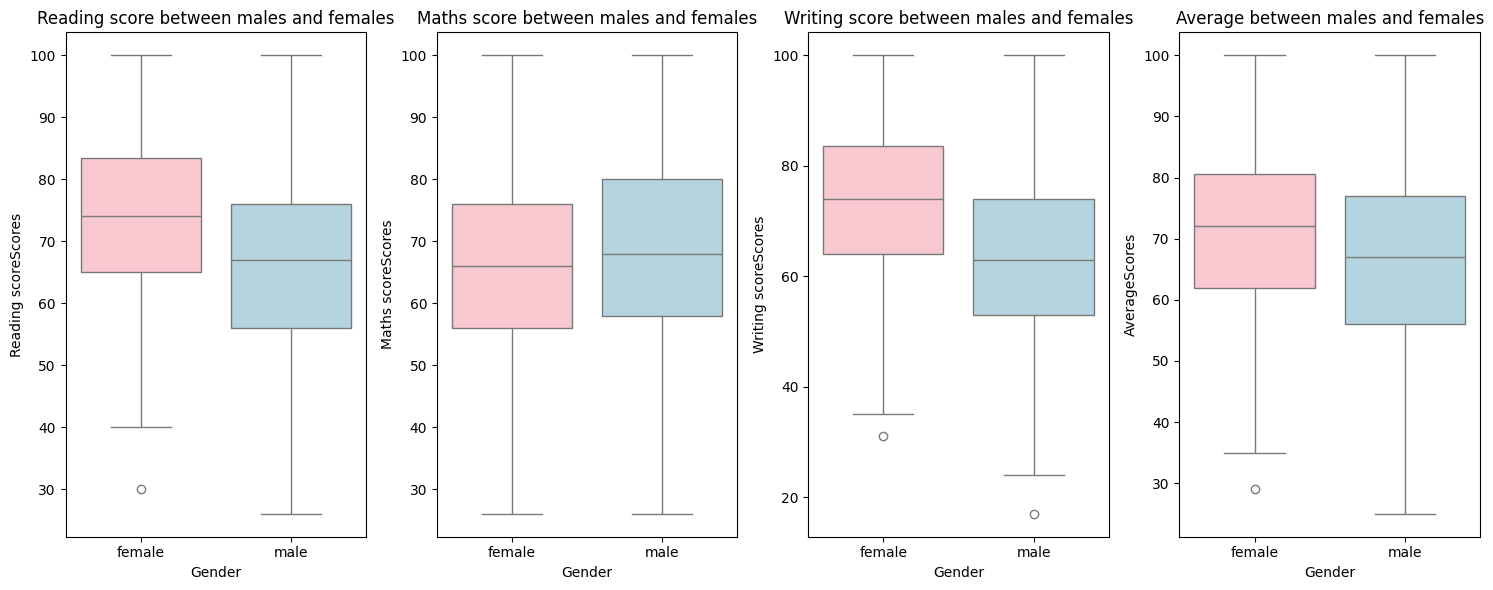

In [12]:
#list of columns
score_cols= ['reading score','maths score', 'writing score', 'average']
fig, axes=plt.subplots(1,4, figsize=(15,6))
#iteration across columns
for i,  score_col in enumerate (score_cols):
  ax = axes[i]
  sns.boxplot(x='Gender', y=score_col, hue= 'Gender', data=df,palette={'male': 'lightblue', 'female': 'pink'},ax=ax)
  ax.set_title(f"{score_col.capitalize()} between males and females")
  ax.set_ylabel(score_col.capitalize()+ 'Scores')
#plot
plt.tight_layout()
plt.show()


###Distribution of preparatory course across groups and gender:
Line chart- Comparing average marks and preparatory course status with 0: No course taken, 1: Course taken.
According to the visual, it is clearly seen that the preparatory course does not provide a positive impact on the average scores of a student.

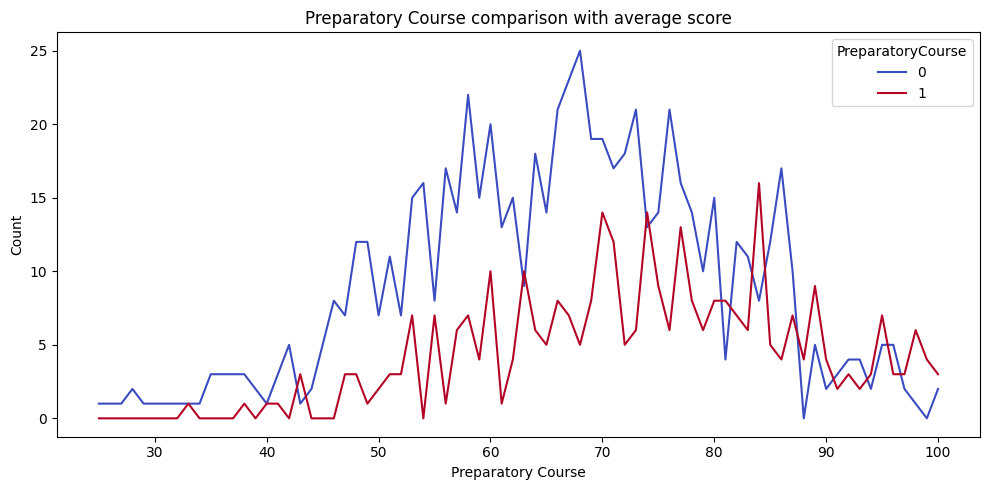

In [13]:
#for df as input dataframe
course_counts = df.groupby(['average', 'PreparatoryCourse']).size().unstack(fill_value=0)
#size of figure
fig, ax = plt.subplots(figsize=(10, 5))
#grouped bar chart
course_counts.plot(kind='line', ax=ax, colormap='coolwarm')
#title and labels
ax.set_title('Preparatory Course comparison with average score')
ax.set_xlabel('Preparatory Course')
ax.set_ylabel('Count')


plt.tight_layout()

plt.show()



In [32]:
per=df.copy() #data copy to be encoded
label_encoders = {}# calling label encoder
for col in per:
  le=LabelEncoder()
  per[col]=le.fit_transform(per[col])
print(per)


     Gender  Group  ParentsQualification  diet  PreparatoryCourse  \
0         0      3                     5     1                  0   
1         1      2                     5     1                  1   
2         1      2                     0     1                  0   
3         1      3                     2     1                  1   
4         0      2                     4     0                  0   
..      ...    ...                   ...   ...                ...   
995       0      2                     3     1                  0   
996       1      2                     4     0                  0   
997       0      4                     0     1                  0   
998       0      3                     2     1                  0   
999       0      1                     4     0                  1   

     maths score  reading score  writing score  average  
0             41             46             49       47  
1             59             61             59       62

###Correlation Matrix:

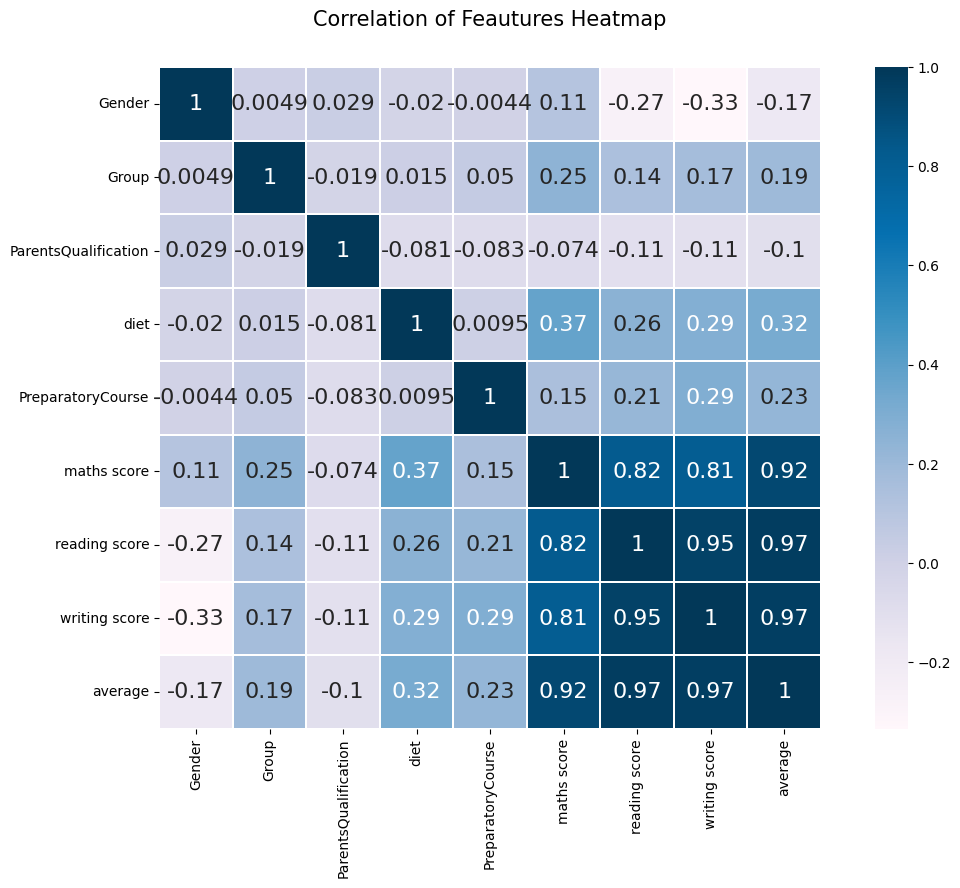

In [35]:
#Correlation matrix
colormap =plt.cm.PuBu# colormap for heatmap
plt.figure(figsize=(12,9))# figure size
plt.title("Correlation of Features Heatmap", y=1.05, size = 15) #title for heatmap
sns.heatmap(per.astype(float).corr(),linewidths = 0.1, vmax = 1.0, square = True, cmap= colormap, linecolor = "white", annot=True, annot_kws={"size": 16})# heatmap syntax
plt.tight_layout()
plt.show()

###Pairplot representation:

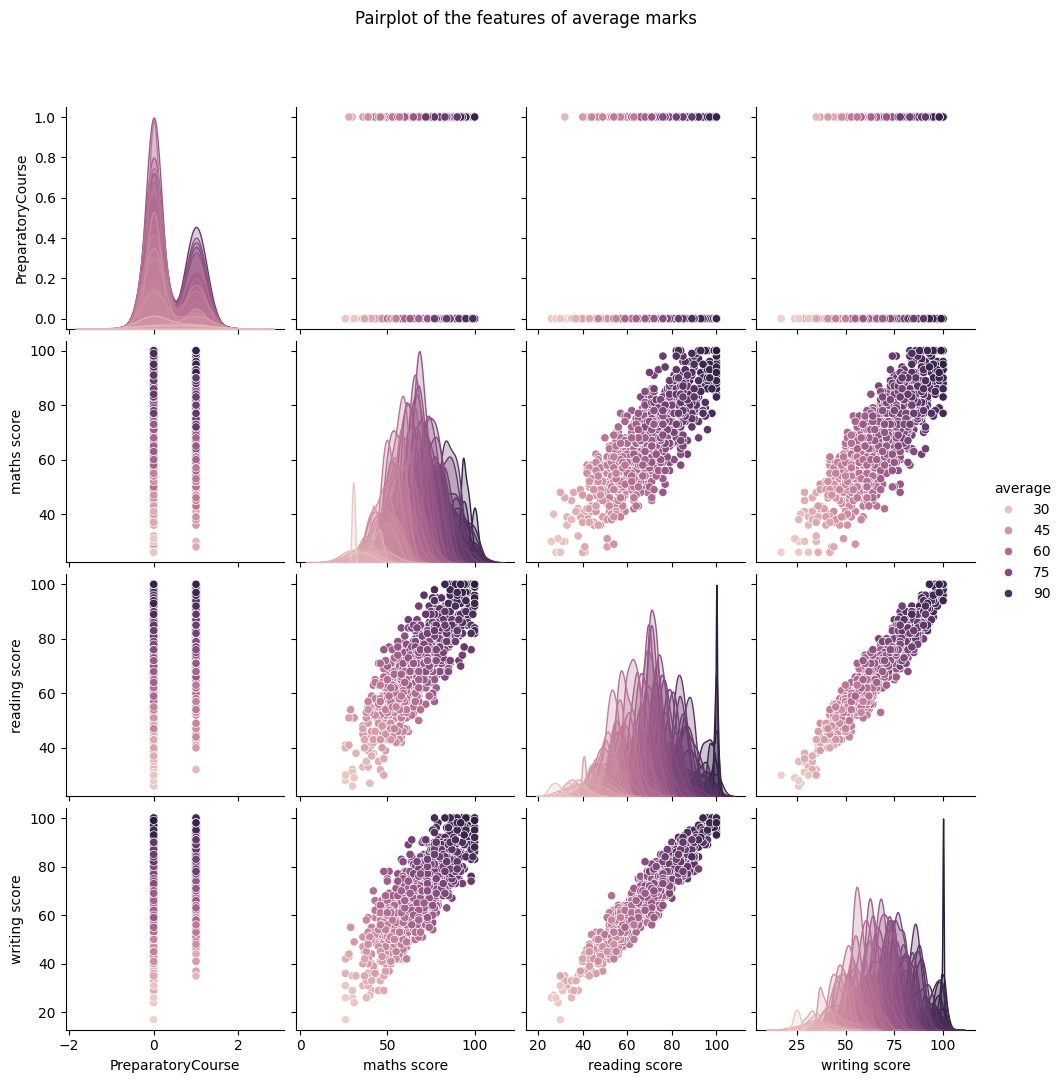

In [37]:
#Pairplot
sns.pairplot(df,hue='average', diag_kind='kde')
plt.suptitle("Pairplot of the features of average marks", y= 1.08)
plt.tighted_layout()
plt.show()

**Key Insights:**


*  The impact of preparatory course on students' scores:
    According to the analysis, the preparatory course has not found beneficial. The average scores of students who did not attempt preparatory course has been seen higher than the ones who attempted it.
  


*  The impact of parental qualification and groups on average score:
    The representation shows that the parental qualification of bachelor's degree and having origin from Group E has shown the highest performance.



*  The impact of meals on the students' average score:
    The violin plot comparing the student's profile according to the provided meals which are free/ reduced and standard. The standard meal has found to be a positive performance on the studies.

**Dataset Representation:**

Caution is recommended for generalize findings beyond the scope of this dataset.

References:

Source dataset: http://roycekimmons.com/tools/generated_data/exams








